In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [3]:
import src.utils.preprocessing as pre

In [4]:
data = pre.import_RFA()

print(data.shape)
data.head(5)

(198275, 7)


,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",Support as conom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",Support as nominator.
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",Support per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",Support per noms. BDD is a strong contributor ...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","Support, with great pleasure. I work with BDD ..."


In [5]:
votes = pd.DataFrame(data.groupby(by='TGT')['VOT'].agg('count'))
votes = votes.rename(columns={'VOT':'votes'})
#votes

data = data.merge(votes, how='left',on='TGT')
data

,SRC,TGT,VOT,RES,YEA,DAT,TXT,votes
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",Support as conom.,137
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",Support as nominator.,137
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",Support per noms.,137
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",Support per noms. BDD is a strong contributor ...,137
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","Support, with great pleasure. I work with BDD ...",137
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support,3
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.,3
198272,Jiang,WhisperToMe,1,1,2003,,Support.,3
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity.,3


# Vote Polarity

In [6]:
vote_polarity_abs = data.groupby(by='TGT')['VOT'].value_counts(normalize=False).unstack(fill_value=0)#.head(10)#.sort_values(by = 'SRC', ascending=False)
vote_polarity_abs = vote_polarity_abs.rename(columns={1:'pos', 0:'neu', -1:'neg'})

vote_polarity_abs


VOT,neg,neu,pos
TGT,,,
(aeropagitica),10,5,40
07bargem,6,0,0
1234r00t,6,0,0
168...,0,0,7
21655,18,2,4
...,...,...,...
zeuspitar,2,0,1
zhudyzhu,2,0,0
Ævar Arnfjörð Bjarmason,32,4,60


In [7]:
vote_polarity_pct = data.groupby(by='TGT')['VOT'].value_counts(normalize=True).unstack(fill_value=0)#.head(10)#.sort_values(by = 'SRC', ascending=False)
vote_polarity_pct = vote_polarity_pct.rename(columns={1:'pos_pct', 0:'neu_pct', -1:'neg_pct'})

vote_polarity_pct


VOT,neg_pct,neu_pct,pos_pct
TGT,,,
(aeropagitica),0.181818,0.090909,0.727273
07bargem,1.000000,0.000000,0.000000
1234r00t,1.000000,0.000000,0.000000
168...,0.000000,0.000000,1.000000
21655,0.750000,0.083333,0.166667
...,...,...,...
zeuspitar,0.666667,0.000000,0.333333
zhudyzhu,1.000000,0.000000,0.000000
Ævar Arnfjörð Bjarmason,0.333333,0.041667,0.625000


In [8]:
vote_polarity = pd.concat([vote_polarity_abs,vote_polarity_pct], axis=1)
vote_polarity

VOT,neg,neu,pos,neg_pct,neu_pct,pos_pct
TGT,,,,,,
(aeropagitica),10,5,40,0.181818,0.090909,0.727273
07bargem,6,0,0,1.000000,0.000000,0.000000
1234r00t,6,0,0,1.000000,0.000000,0.000000
168...,0,0,7,0.000000,0.000000,1.000000
21655,18,2,4,0.750000,0.083333,0.166667
...,...,...,...,...,...,...
zeuspitar,2,0,1,0.666667,0.000000,0.333333
zhudyzhu,2,0,0,1.000000,0.000000,0.000000
Ævar Arnfjörð Bjarmason,32,4,60,0.333333,0.041667,0.625000


In [9]:
data_vote_polarity = data.merge(vote_polarity, how='left', on='TGT')
data_vote_polarity

,SRC,TGT,VOT,RES,YEA,DAT,TXT,votes,neg,neu,pos,neg_pct,neu_pct,pos_pct
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",Support as conom.,137,14,4,119,0.10219,0.029197,0.868613
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",Support as nominator.,137,14,4,119,0.10219,0.029197,0.868613
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",Support per noms.,137,14,4,119,0.10219,0.029197,0.868613
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",Support per noms. BDD is a strong contributor ...,137,14,4,119,0.10219,0.029197,0.868613
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","Support, with great pleasure. I work with BDD ...",137,14,4,119,0.10219,0.029197,0.868613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support,3,0,0,3,0.00000,0.000000,1.000000
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.,3,0,0,3,0.00000,0.000000,1.000000
198272,Jiang,WhisperToMe,1,1,2003,,Support.,3,0,0,3,0.00000,0.000000,1.000000
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity.,3,0,0,3,0.00000,0.000000,1.000000


# Pass Rate (Overall)

Text(0.5, 1.0, 'Percentage of Passed RFA overall')

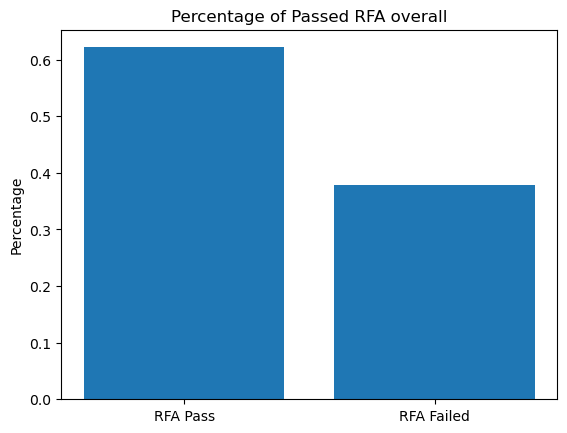

In [10]:
plt.bar(['RFA Pass','RFA Failed'],data_vote_polarity.RES.value_counts(normalize=True))
plt.ylabel('Percentage')
plt.title('Percentage of Passed RFA overall')

In [14]:
import plotly.io as pio
import plotly.tools as tls

In [23]:
fig, ax = plt.subplots()
bars = ax.bar(['RFA Pass','RFA Failed'],data_vote_polarity.RES.value_counts(normalize=True))
plt.ylabel('Percentage')
plt.title('Percentage of Passed RFA overall')
fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly(fig)
pio.write_html(plotly_fig, file='Plots/overall_pass_rate.html')

## Pass Rate by Year

In [ ]:
data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0)

RES,-1,1
YEA,,
2003,0,203
2004,1440,5101
2005,4919,15320
2006,18361,26964
2007,15183,26358
2008,13237,17242
2009,9575,11800
2010,5287,8683
2011,2693,5863


In [ ]:
data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=True).unstack(fill_value=0)

RES,-1,1
YEA,,
2003,0.000000,1.000000
2004,0.220150,0.779850
2005,0.243046,0.756954
2006,0.405097,0.594903
2007,0.365494,0.634506
2008,0.434299,0.565701
2009,0.447953,0.552047
2010,0.378454,0.621546
2011,0.314750,0.685250


C:\Users\alexa\AppData\Local\Temp\ipykernel_19084\2985959063.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1).index[i], data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1)[i]),
C:\Users\alexa\AppData\Local\Temp\ipykernel_19084\2985959063.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1).index[i], data.groupby(by='YEA')[['RES','YEA']].valu

Text(0.5, 1.0, 'Evolution of Pass Rates and votes')

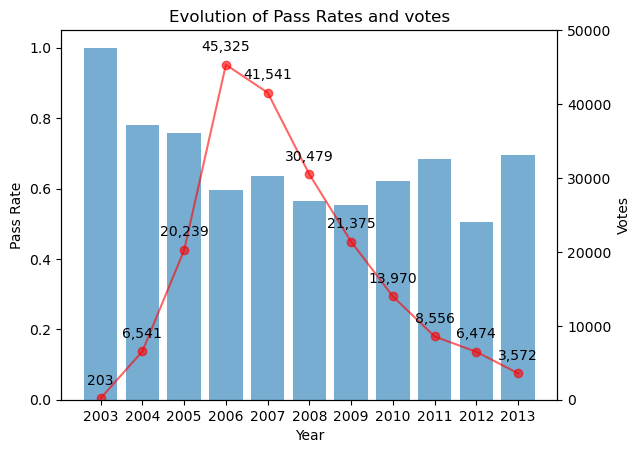

In [ ]:
fig, ax1 = plt.subplots()

ax1.bar(data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).index, 
        data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=True).unstack(fill_value=0)[1], alpha=.6)

ax1.set_xlabel('Year')
ax1.set_ylabel('Pass Rate')


ax2 = ax1.twinx()
ax2.plot(data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).index, 
        data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1), color ='red', alpha=.6, marker= 'o')

ax2.set_ylim((0,50000))
ax2.set_ylabel('Votes')

# Add values to the percentage line plot
for i, txt in enumerate(data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1)):
    ax2.annotate(f"{txt:,}",  # Format the value to 2 decimal places
                 (data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1).index[i], data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1)[i]),
                 textcoords="offset points",
                 xytext=(0, 10),  # Offset the text slightly above the point
                 ha='center', color='black')

plt.title('Evolution of Pass Rates and votes')

In [26]:
fig, ax1 = plt.subplots()

ax1.bar(data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).index, 
        data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=True).unstack(fill_value=0)[1], alpha=.6)

ax1.set_xlabel('Year')
ax1.set_ylabel('Pass Rate')


ax2 = ax1.twinx()
ax2.plot(data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).index, 
        data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1), color ='red', alpha=.6, marker= 'o')

ax2.set_ylim((0,50000))
ax2.set_ylabel('Votes')

# Add values to the percentage line plot
for i, txt in enumerate(data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1)):
    ax2.annotate(f"{txt:,}",  # Format the value to 2 decimal places
                 (data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1).index[i], data.groupby(by='YEA')[['RES','YEA']].value_counts(normalize=False).unstack(fill_value=0).agg('sum', axis=1)[i]),
                 textcoords="offset points",
                 xytext=(0, 10),  # Offset the text slightly above the point
                 ha='center', color='black')

plt.title('Evolution of Pass Rates and votes')
fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly(fig)
pio.write_html(plotly_fig, file='Plots/Evolution_of_Pass_Rates_and_votes.html')

C:\Users\alexa\AppData\Local\Temp\ipykernel_9260\183407558.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\alexa\AppData\Local\Temp\ipykernel_9260\183407558.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\alexa\AppData\Local\Temp\ipykernel_9260\183407558.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\alexa\AppData\Local\Temp\ipykernel_9260\183407558.py:20: FutureWarning:

Series.__getitem__

Main Insights: 
- First year can be an anomaly since we don't have any negatives (may be an issue with the data) 
- 2004 onwards, pass rate is between 55% and 75% --> overall, chance of passing each year --> not really affected by growth in volume
- application volume increased till 2006; consistent decline since 2006 --> exponential growth and decline??? --> does wiki RFA have enough admins now?

Questions: 
- Does voter participation also increase over the years: total unique voters per year, elections voted per voter per year?
- should we drop 2003 year --> small sample and potentially tainted --> remove outliers

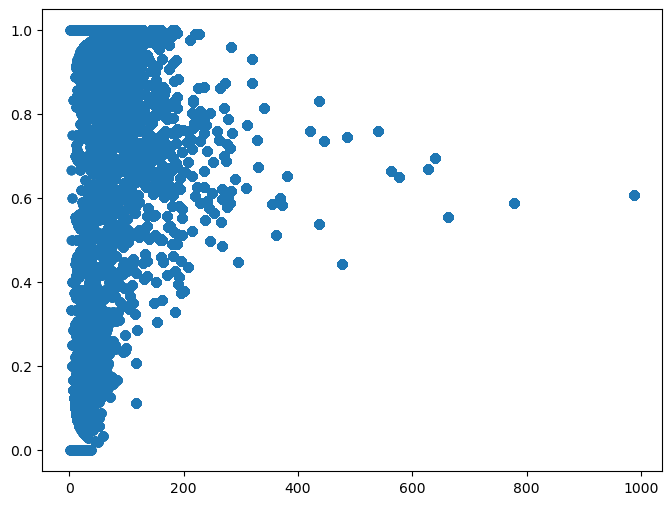

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(data_vote_polarity.votes, data_vote_polarity.pos_pct)

#Zoom in to focus on 0 to 200 (97.5% of data)
#plt.xlim((0,200))




In [29]:
plt.figure(figsize=(8,6))
plt.scatter(data_vote_polarity.votes, data_vote_polarity.pos_pct)

fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly(fig)
pio.write_html(plotly_fig, file='Plots/vote_polarity.html')

Tried to see if there's any trend for participants and pass rates --> do we see higher pass rates for elections with more votes or opposite

next steps:
- remove 2003 data since it is only positive?
- plot by year (subplots), add slopes to compare trends (if any)
- try standardizing data

# Vote Distribution by Election

In [31]:
data_by_tgt = data.groupby(by='TGT').count().sort_values(by = 'SRC', ascending=False)
print(data_by_tgt.shape)
data_by_tgt.head(20)

(3497, 7)


,SRC,VOT,RES,YEA,DAT,TXT,votes
TGT,,,,,,,
Everyking,987,987,987,987,987,987,987
TenPoundHammer,778,778,778,778,778,778,778
MZMcBride,663,663,663,663,663,663,663
Cobi,639,639,639,639,639,639,639
Elonka,628,628,628,628,628,628,628
Ironholds,577,577,577,577,577,577,577
Kww,563,563,563,563,563,563,563
Werdna,540,540,540,540,540,540,540
Enigmaman,486,486,486,486,486,486,486


In [32]:
#To check vote counts above a certain threshold
data_by_tgt[data_by_tgt['SRC']>200].SRC.count()

91

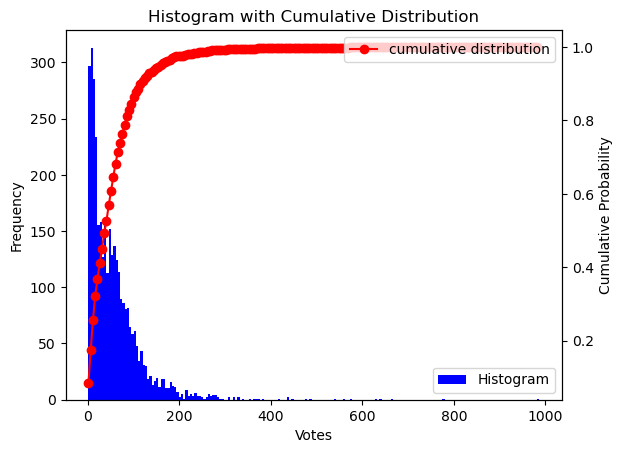

In [35]:
fig, ax1 = plt.subplots()

counts, bins, patches = ax1.hist(data_by_tgt.SRC, bins= 200, cumulative = False, color= 'blue', label = 'Histogram')

#ax1 = plt.hist(x = data_by_tgt.SRC, bins=200, cumulative=False, label='Histogram')
ax1.set_xlabel('Votes')
ax1.set_ylabel('Frequency')
ax1.legend(loc= 'lower right')

cumulative = np.cumsum(counts)
cumulative = cumulative / cumulative[-1]

ax2 = ax1.twinx()

ax2.plot(bins[:-1], cumulative, color ='red', marker='o', label = 'cumulative distribution')

ax2.set_ylabel('Cumulative Probability')
ax2.legend(loc = 'upper right')

plt.title('Histogram with Cumulative Distribution') 
plt.show()

In [ ]:
election_mean = data_by_tgt.SRC.mean()
election_median = data_by_tgt.SRC.median()
election_mode = data_by_tgt.sort_values('SRC', ascending=True).SRC.quantile(q=0.5)
election_quant_9 = data_by_tgt.sort_values('SRC', ascending=True).SRC.quantile(q=0.9)

print('Mean: {:.0f} \nMedian: {:.0f} \nMode: {:.0f} \n90th percentile: {:.0f}'.format(election_mean, election_median, election_mode,election_quant_9 ))


Mean: 57 
Median: 41 
Mode: 41 
90th percentile: 120


In [ ]:
print('From above, we see that, on average, we have {:.1f} for an election.\
      \nHalf of our elections will have less than {:.0f} votes.\
      \nThe most frequent vote count for an election will be {:.0f} votes\
      \nWe can see that the 90% of the elections have less than {:.0f} votes.\
      '.format(election_mean, election_median, election_mode,election_quant_9))

From above, we see that, on average, we have 56.7 for an election.      
Half of our elections will have less than 41 votes.      
The most frequent vote count for an election will be 41 votes      
We can see that the 90% of the elections have less than 120 votes.      
